# Análisis de datos de partidos de tenis

- Se tienen datos desde 1968 a 2023

- Se va considerar el análisis desde el debut de **Roger Federer** en 1998

- **Fuente:** https://github.com/JeffSackmann/tennis_atp

In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import altair as alt
csv_files = glob.glob('data1998/atp_matches_*.csv')
all_data = pd.DataFrame()

for file in csv_files:
    df = pd.read_csv(file)
    all_data = pd.concat([all_data, df], axis= 0 )

# Descripción de las Columnas del DataFrame de Partidos de Tenis

- **tourney_id**: Identificador único para cada torneo, por ejemplo, 2020-888. Los primeros cuatro caracteres siempre representan el año.

- **tourney_name**: Nombre del torneo.

- **surface**: Superficie de juego del torneo (por ejemplo, 'hard', 'clay', 'grass').

- **draw_size**: Número de jugadores en el cuadro del torneo, a menudo redondeado al número más cercano potencia de 2.

- **tourney_level**: Nivel del torneo. 
  - Hombres: 'G' = Grand Slams, 'M' = Masters 1000s, 'A' = otros eventos de nivel tour, 'C' = Challengers, 'S' = Satellites/ITFs, 'F' = finales de temporada y otros eventos finales, 'D' = Copa Davis.
  - Mujeres: Adicionalmente 'P' = Premier, 'PM' = Premier Mandatory, 'I' = Internacional, niveles de ITFs por premio en dinero, como '15' = ITF $15,000. También 'T1' para Tier I, etc. 'D' = Copa Federación/Billie Jean King.

- **tourney_date**: Fecha del torneo en formato YYYYMMDD, usualmente el lunes de la semana del torneo.

- **match_num**: Identificador específico del partido, que puede empezar desde 1, contar desde 300, o ser arbitrario.

- **winner_id**: Identificador del jugador ganador del partido.

- **winner_seed**: Cabeza de serie del jugador ganador.

- **winner_entry**: Método de entrada del jugador ganador (por ejemplo, 'WC' = comodín, 'Q' = clasificado, 'LL' = perdedor afortunado, 'PR' = ranking protegido).

- **winner_name**: Nombre del jugador ganador.

- **winner_hand**: Mano dominante del jugador ganador ('R' = derecha, 'L' = izquierda, 'U' = desconocido).

- **winner_ht**: Altura del jugador ganador en centímetros.

- **winner_ioc**: Código de tres caracteres del país del jugador ganador.

- **winner_age**: Edad del jugador ganador en años, a la fecha del torneo.

- **loser_id**: Identificador del jugador perdedor del partido.

- **loser_seed**: Cabeza de serie del jugador perdedor.

- **loser_entry**: Método de entrada del jugador perdedor (similar a winner_entry).

- **loser_name**: Nombre del jugador perdedor.

- **loser_hand**: Mano dominante del jugador perdedor ('R' = derecha, 'L' = izquierda, 'U' = desconocido).

- **loser_ht**: Altura del jugador perdedor en centímetros.

- **loser_ioc**: Código de tres caracteres del país del jugador perdedor.

- **loser_age**: Edad del jugador perdedor en años, a la fecha del torneo.

- **score**: Puntuación del partido.

- **best_of**: Número máximo de sets en el partido ('3' o '5').

- **round**: Ronda del torneo en la que se jugó el partido.

- **minutes**: Duración del partido en minutos.

- **w_ace**: Número de aces del jugador ganador.

- **w_df**: Número de dobles faltas del jugador ganador.

- **w_svpt**: Número de puntos de servicio del jugador ganador.

- **w_1stIn**: Número de primeros servicios acertados por el jugador ganador.

- **w_1stWon**: Número de puntos ganados con el primer servicio por el jugador ganador.

- **w_2ndWon**: Número de puntos ganados con el segundo servicio por el jugador ganador.

- **w_SvGms**: Número de juegos de servicio del jugador ganador.

- **w_bpSaved**: Número de puntos de break salvados por el jugador ganador.

- **w_bpFaced**: Número de puntos de break enfrentados por el jugador ganador.

- **l_ace**: Número de aces del jugador perdedor.

- **l_df**: Número de dobles faltas del jugador perdedor.

- **l_svpt**: Número de puntos de servicio del jugador perdedor.

- **l_1stIn**: Número de primeros servicios acertados por el jugador perdedor.

- **l_1stWon**: Número de puntos ganados con el primer servicio por el jugador perdedor.

- **l_2ndWon**: Número de puntos ganados con el segundo servicio por el jugador perdedor.

- **l_SvGms**: Número de juegos de servicio del jugador perdedor.

- **l_bpSaved**: Número de puntos de break salvados por el jugador perdedor.

- **l_bpFaced**: Número de puntos de break enfrentados por el jugador perdedor.

- **winner_rank**: Ranking ATP o WTA del jugador ganador, a la fecha del torneo o la fecha más reciente antes del torneo.

- **winner_rank_points**: Puntos de ranking del jugador ganador.

- **loser_rank**: Ranking ATP o WTA del jugador perdedor, a la fecha del torneo o la fecha más reciente antes del torneo.

- **loser_rank_points**: Puntos de ranking del jugador perdedor.


# Preguntas de interés para este conjunto de datos de partidos de tenis

- ¿Qué jugadores tienen el mejor rendimiento en cada tipo de superficie (dura, arcilla, césped)?
- ¿Hay jugadores que sobresalen en una superficie en particular pero tienen un desempeño promedio o bajo en otras?

- ¿Cuál es la correlación entre el ranking del jugador y el resultado del partido?

- ¿Cuántas veces han ocurrido sorpresas (donde un jugador de menor ranking derrota a uno de mayor ranking)?

- ¿Cómo varían los patrones de servicio (aces, dobles faltas, primeros servicios acertados) entre los jugadores ganadores y perdedores?
- ¿Hay jugadores que destacan por su número de aces o por la eficacia de su primer servicio?

- ¿A qué edad suelen alcanzar su mejor rendimiento los jugadores?


In [2]:
all_data.describe()

,draw_size,tourney_date,match_num,winner_id,winner_seed,winner_ht,winner_age,loser_id,loser_seed,loser_ht,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
count,78755.000000,7.875500e+04,78755.000000,78755.000000,32325.000000,76865.000000,78749.000000,78755.000000,17902.000000,75022.000000,...,71538.000000,71538.000000,71538.000000,71539.000000,71538.000000,71538.000000,78069.000000,78069.000000,77112.000000,77109.000000
mean,54.672186,2.009918e+07,89.646042,108555.098445,7.288940,186.025447,26.176435,108642.623567,8.724053,185.504945,...,48.415709,32.306480,14.997009,12.288570,4.792278,8.654128,80.011029,1557.097196,118.014083,959.324579
std,39.760451,7.482506e+04,126.516932,18368.721299,6.663536,6.767186,3.922391,18465.123296,7.182945,6.718684,...,19.299393,14.431116,7.216454,4.210086,3.278840,4.150595,138.614551,1931.529061,185.639131,1088.943817
min,2.000000,1.998010e+07,1.000000,100644.000000,1.000000,163.000000,14.900000,100644.000000,1.000000,163.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,32.000000,2.003093e+07,11.000000,103206.000000,3.000000,183.000000,23.300000,103171.000000,4.000000,180.000000,...,35.000000,22.000000,10.000000,9.000000,2.000000,6.000000,18.000000,568.000000,36.000000,425.000000
50%,32.000000,2.010011e+07,27.000000,104225.000000,5.000000,185.000000,26.000000,104229.000000,7.000000,185.000000,...,45.000000,30.000000,14.000000,11.000000,4.000000,8.000000,45.000000,928.000000,68.000000,700.000000
75%,64.000000,2.016072e+07,126.000000,105208.000000,9.000000,190.000000,28.800000,105331.000000,12.000000,190.000000,...,59.000000,40.000000,19.000000,15.000000,7.000000,11.000000,86.000000,1710.000000,115.000000,1094.000000
max,128.000000,2.023113e+07,1701.000000,212051.000000,35.000000,211.000000,43.600000,212044.000000,35.000000,211.000000,...,328.000000,284.000000,101.000000,91.000000,27.000000,38.000000,2101.000000,16950.000000,2159.000000,16950.000000


array([[<Axes: title={'center': 'draw_size'}>,
        <Axes: title={'center': 'tourney_date'}>,
        <Axes: title={'center': 'match_num'}>,
        <Axes: title={'center': 'winner_id'}>,
        <Axes: title={'center': 'winner_seed'}>,
        <Axes: title={'center': 'winner_ht'}>],
       [<Axes: title={'center': 'winner_age'}>,
        <Axes: title={'center': 'loser_id'}>,
        <Axes: title={'center': 'loser_seed'}>,
        <Axes: title={'center': 'loser_ht'}>,
        <Axes: title={'center': 'loser_age'}>,
        <Axes: title={'center': 'best_of'}>],
       [<Axes: title={'center': 'minutes'}>,
        <Axes: title={'center': 'w_ace'}>,
        <Axes: title={'center': 'w_df'}>,
        <Axes: title={'center': 'w_svpt'}>,
        <Axes: title={'center': 'w_1stIn'}>,
        <Axes: title={'center': 'w_1stWon'}>],
       [<Axes: title={'center': 'w_2ndWon'}>,
        <Axes: title={'center': 'w_SvGms'}>,
        <Axes: title={'center': 'w_bpSaved'}>,
        <Axes: title={'cent

<Figure size 1600x1600 with 0 Axes>

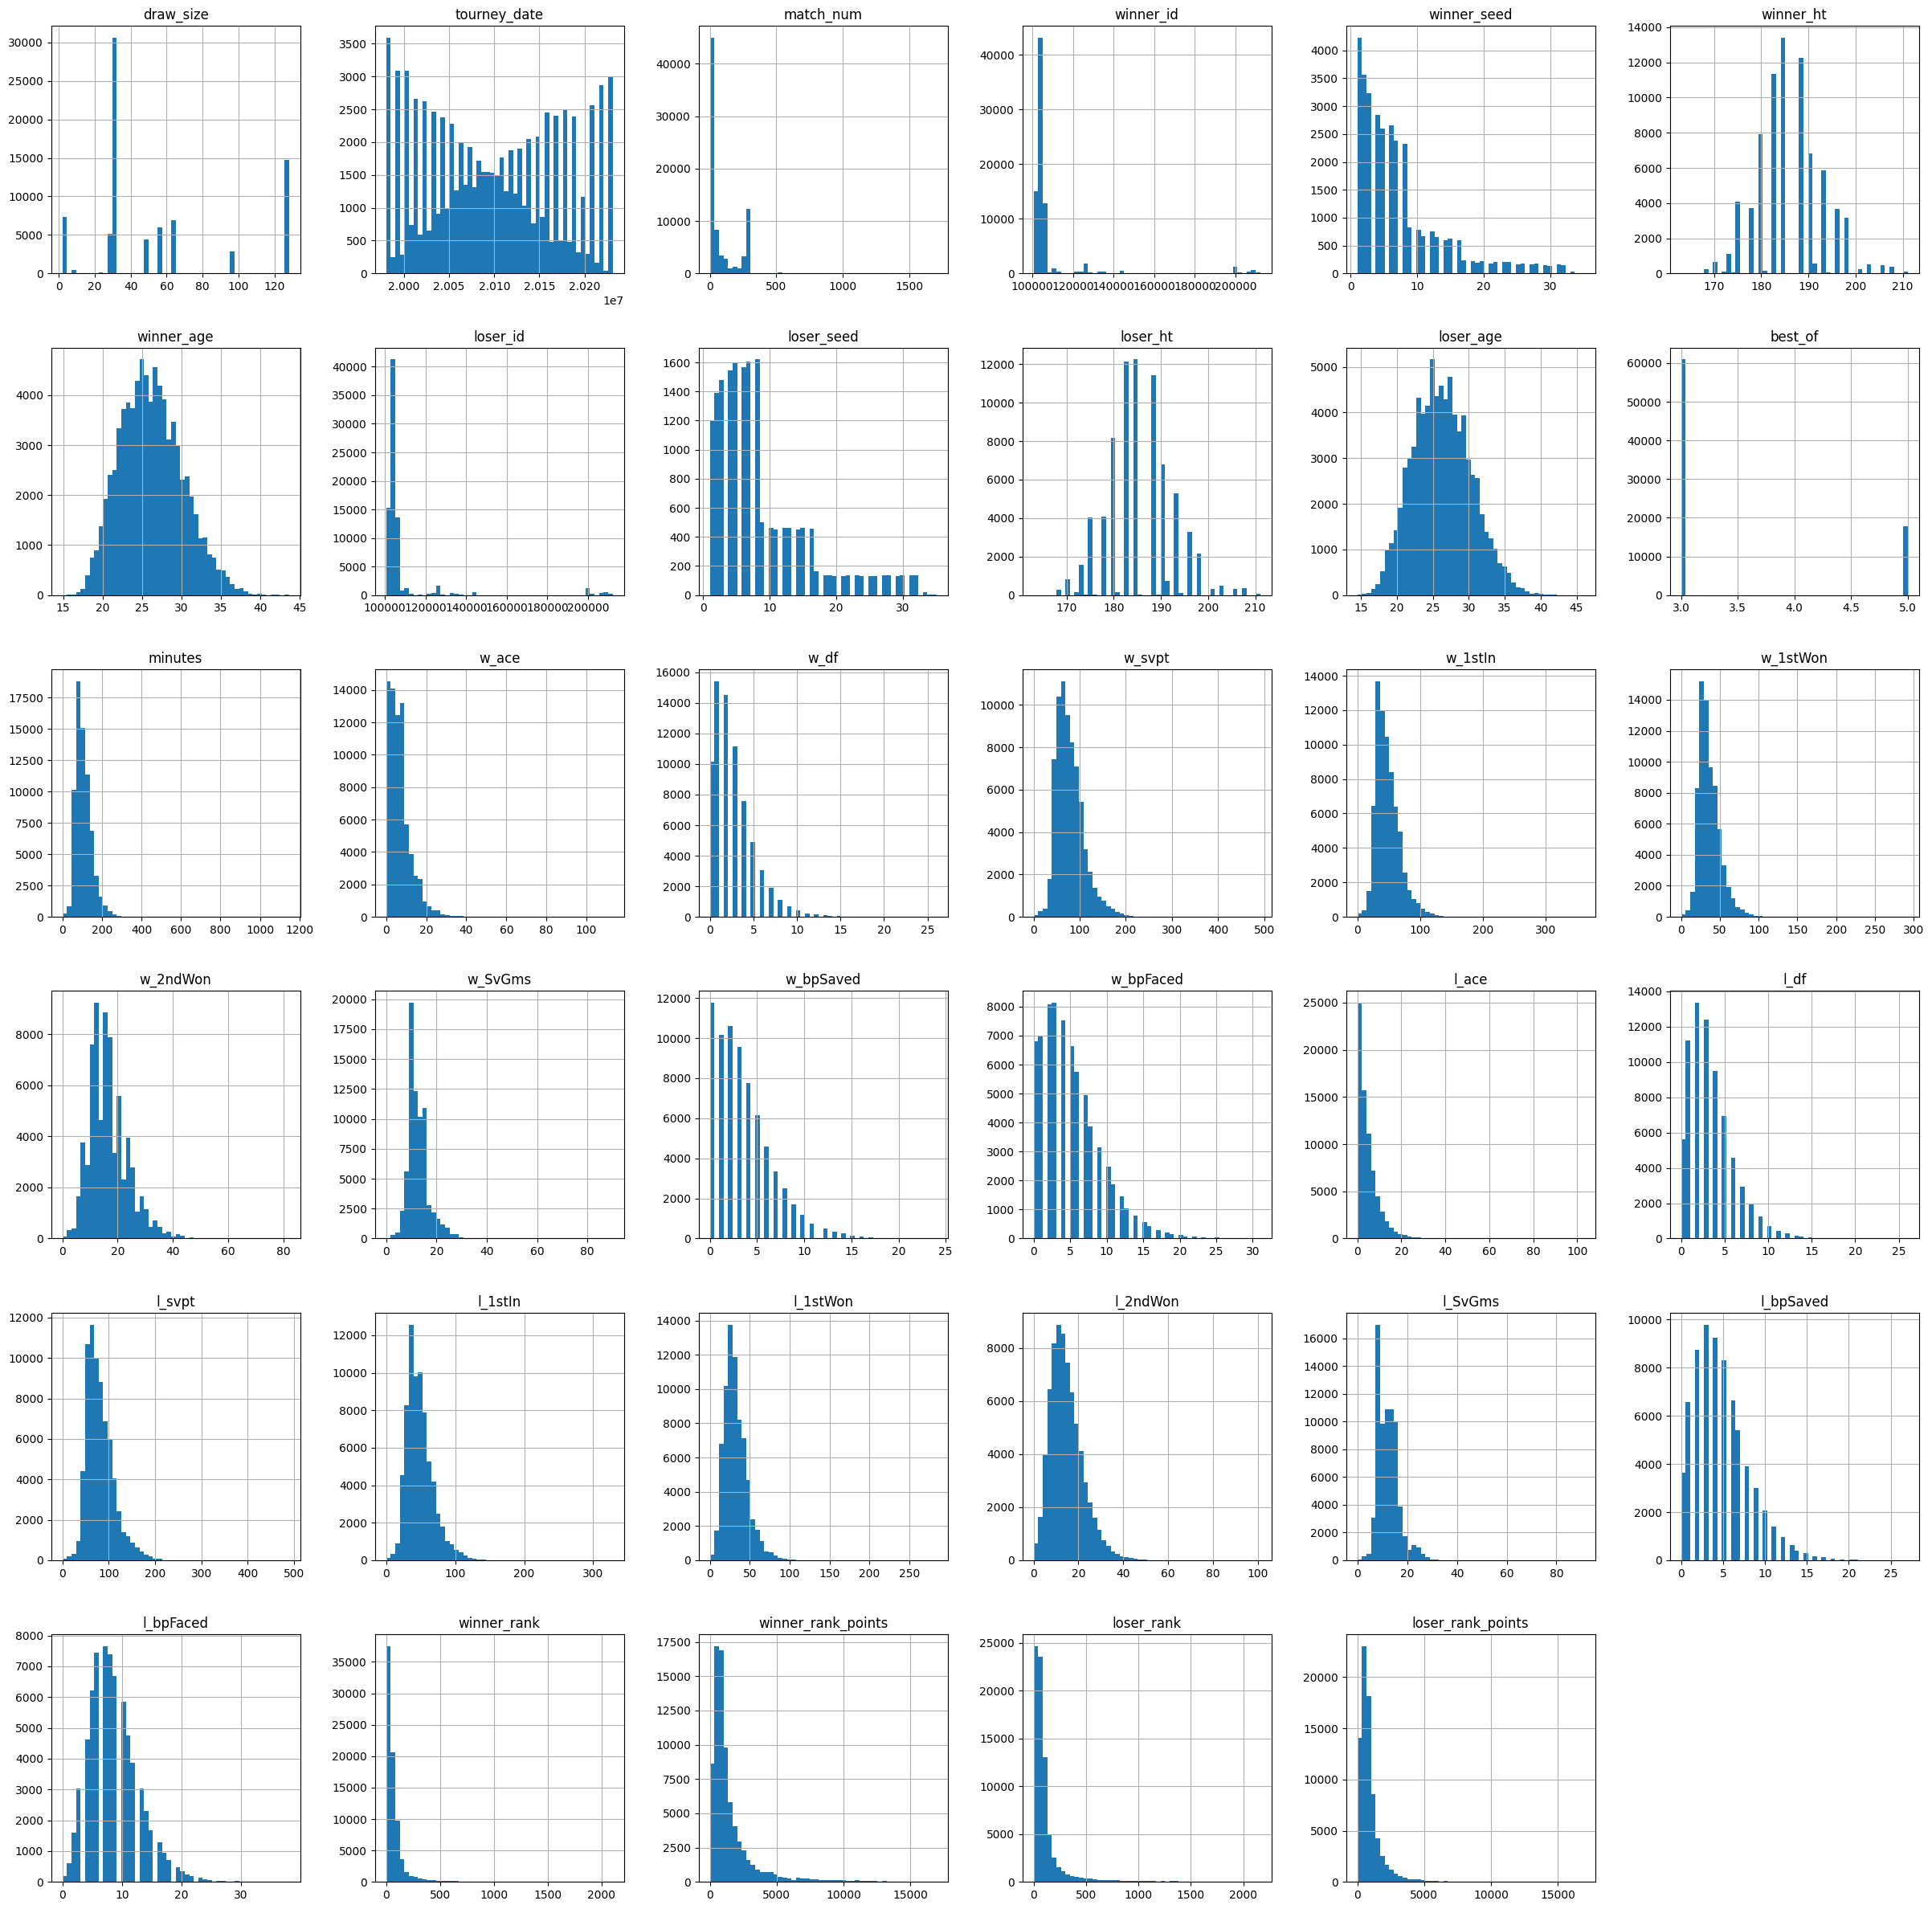

In [3]:
# Filtrar solo las columnas numéricas
numeric_columns = all_data.select_dtypes(include=['number']).columns

plt.figure(figsize=(16, 16))
all_data[numeric_columns].hist(bins=50, figsize=(30,30))

- #### ¿Qué jugadores tienen el mejor rendimiento en cada tipo de superficie (dura, arcilla, césped)?

In [4]:
#  Separamos los datos por superficie

DfHard = all_data[all_data["surface"] == 'Hard']
DfGrass = all_data[all_data["surface"] == 'Grass']
DfClay = all_data[all_data["surface"] == 'Clay']


In [5]:
# Queremos saber las victorias de cada jugador, independiente del tipo de torneo. Por lo que 
# le estariamos dando el mismo valor a un Grand Slam y aun ATP 250

# Consideramos un mínimo de 100 partidos para los cálculos
def TasaDeVictoria(data):
    victorias = data['winner_name'].value_counts()
    derrotas = data['loser_name'].value_counts()
    TotalPartidos = victorias + derrotas
    TotalPartidos = TotalPartidos[TotalPartidos >= 100]
    TasaVictorias = victorias/ TotalPartidos
    return TasaVictorias

In [6]:
TasaVictorias_Hard = TasaDeVictoria(DfHard)
TasaVictorias_Grass = TasaDeVictoria(DfGrass)
TasaVictorias_Clay = TasaDeVictoria(DfClay)


In [7]:
Top_Hard = TasaVictorias_Hard.sort_values(ascending=False).head(10)
Top_Grass = TasaVictorias_Grass.sort_values(ascending=False).head(10)
Top_Clay = TasaVictorias_Clay.sort_values(ascending=False).head(10)

In [8]:
print(Top_Hard)

Novak Djokovic     0.848851
Roger Federer      0.833158
Andre Agassi       0.791667
Rafael Nadal       0.773669
Andy Roddick       0.751773
Daniil Medvedev    0.750000
Pete Sampras       0.747126
Andy Murray        0.744838
Jannik Sinner      0.739362
Carlos Alcaraz     0.735294
Name: count, dtype: float64


In [9]:
print(Top_Grass)

Roger Federer      0.869955
Novak Djokovic     0.858209
Andy Murray        0.804054
Andy Roddick       0.798165
Lleyton Hewitt     0.754386
Marin Cilic        0.701754
Richard Gasquet    0.646552
Ivo Karlovic       0.627119
Feliciano Lopez    0.626761
Sam Querrey        0.624000
Name: count, dtype: float64


In [10]:
print(Top_Clay)

Rafael Nadal           0.910476
Novak Djokovic         0.806452
Stefanos Tsitsipas     0.760000
Roger Federer          0.756667
Casper Ruud            0.730539
Juan Carlos Ferrero    0.727794
Gustavo Kuerten        0.723982
Alexander Zverev       0.723164
Guillermo Coria        0.716578
Carlos Moya            0.709677
Name: count, dtype: float64


In [20]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78755 entries, 0 to 2985
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          78755 non-null  object 
 1   tourney_name        78755 non-null  object 
 2   surface             78702 non-null  object 
 3   draw_size           78755 non-null  int64  
 4   tourney_level       78755 non-null  object 
 5   tourney_date        78755 non-null  int64  
 6   match_num           78755 non-null  int64  
 7   winner_id           78755 non-null  int64  
 8   winner_seed         32325 non-null  float64
 9   winner_entry        9912 non-null   object 
 10  winner_name         78755 non-null  object 
 11  winner_hand         78748 non-null  object 
 12  winner_ht           76865 non-null  float64
 13  winner_ioc          78755 non-null  object 
 14  winner_age          78749 non-null  float64
 15  loser_id            78755 non-null  int64  
 16  loser_seed

In [21]:
DataNumerico = all_data.select_dtypes(include=['number'])

In [22]:
DataNumerico.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78755 entries, 0 to 2985
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   draw_size           78755 non-null  int64  
 1   tourney_date        78755 non-null  int64  
 2   match_num           78755 non-null  int64  
 3   winner_id           78755 non-null  int64  
 4   winner_seed         32325 non-null  float64
 5   winner_ht           76865 non-null  float64
 6   winner_age          78749 non-null  float64
 7   loser_id            78755 non-null  int64  
 8   loser_seed          17902 non-null  float64
 9   loser_ht            75022 non-null  float64
 10  loser_age           78746 non-null  float64
 11  best_of             78755 non-null  int64  
 12  minutes             69934 non-null  float64
 13  w_ace               71538 non-null  float64
 14  w_df                71538 non-null  float64
 15  w_svpt              71538 non-null  float64
 16  w_1stIn   

<Axes: >

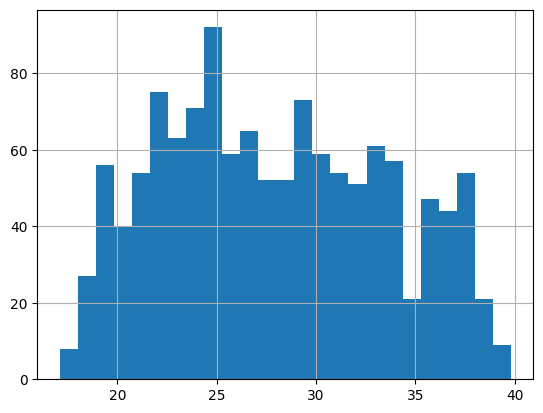

In [63]:
all_data[all_data["winner_name"] == 'Roger Federer']["winner_age"].hist(bins=25)